In [1]:
import camb
import healpy as hp
import matplotlib.pyplot as plt
import sys
import os
import time
import numpy as np

In [2]:
nthread = os.cpu_count()

In [3]:
sys.path.append('../')

In [4]:
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  As=2e-9, ns=0.965, halofit_version='mead', lmax=4000)
results = camb.get_results(pars)
lensed_cl = results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=True)['lensed_scalar']

In [5]:
%load_ext autoreload
%autoreload 2
from pynilc.sht import HealpixDUCC

In [6]:
nside = 1024
lmax = 3*nside - 1 - 1000

In [7]:
cmb_map = hp.synfast(lensed_cl.T, nside=nside, new=True)

In [8]:
hpm = HealpixDUCC(nside)

# Map to Alm

In [9]:
st = time.time()
alms_hp = hp.map2alm(cmb_map, lmax=lmax)
print(f"Time for healpy alm: {time.time() - st}")

Time for healpy alm: 18.045933961868286


In [10]:
st = time.time()
alms_hpm = hpm.map2alm(cmb_map, lmax=lmax, nthreads=nthread)
print(f"Time for pynilc alm: {time.time() - st}")

Time for pynilc alm: 2.5917937755584717


(2, 2071)

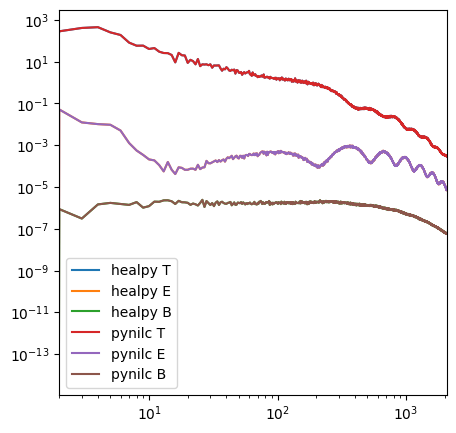

In [11]:
plt.figure(figsize=(5, 5))
plt.loglog(hp.alm2cl(alms_hp[0]), label='healpy T')
plt.loglog(hp.alm2cl(alms_hp[1]), label='healpy E')
plt.loglog(hp.alm2cl(alms_hp[2]), label='healpy B')
plt.loglog(hp.alm2cl(alms_hpm[0]), label='pynilc T')
plt.loglog(hp.alm2cl(alms_hpm[1]), label='pynilc E')
plt.loglog(hp.alm2cl(alms_hpm[2]), label='pynilc B')
plt.legend()
plt.xlim(2, lmax)

In [12]:
np.allclose(alms_hp, alms_hpm, atol=1e-2)

True

# Alm to Map

In [13]:
st = time.time()
map_hp = hp.alm2map(alms_hp, nside=nside)
print(f"Time for healpy map: {time.time() - st}")

Time for healpy map: 2.6740670204162598


In [14]:
st = time.time()
map_hpm = hpm.alm2map(alms_hpm, lmax=lmax, nthreads=nthread)
print(f"Time for pynilc map: {time.time() - st}")

Time for pynilc map: 3.044499158859253


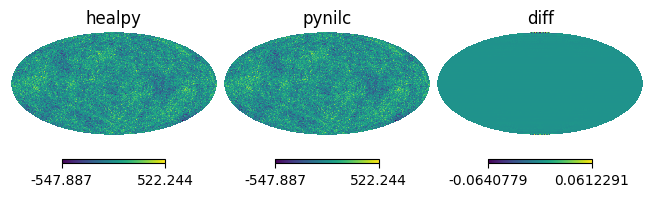

In [15]:
hp.mollview(map_hp[0], title='healpy',sub=(1,3,1))
hp.mollview(map_hpm[0], title='pynilc', sub=(1,3,2))
hp.mollview(map_hp[0] - map_hpm[0], title='diff', sub=(1,3,3))


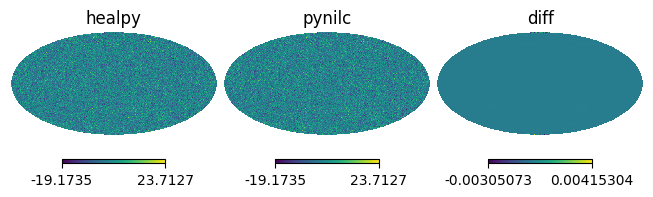

In [16]:
hp.mollview(map_hp[1], title='healpy',sub=(1,3,1))
hp.mollview(map_hpm[1], title='pynilc', sub=(1,3,2))
hp.mollview(map_hp[1] - map_hpm[1], title='diff', sub=(1,3,3))

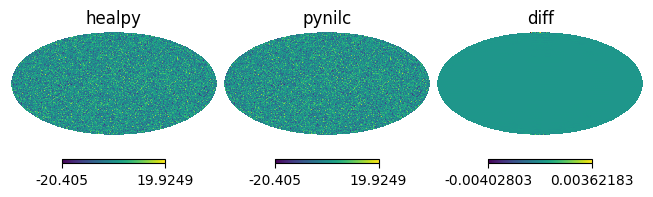

In [17]:
hp.mollview(map_hp[2], title='healpy',sub=(1,3,1))
hp.mollview(map_hpm[2], title='pynilc', sub=(1,3,2))
hp.mollview(map_hp[2] - map_hpm[2], title='diff', sub=(1,3,3))

# Smoothing

In [18]:
fwhm = 30

In [19]:
st = time.time()
sm_map_hp = hp.smoothing(cmb_map, fwhm=np.radians(fwhm/60), lmax=lmax)
print(f"Time for healpy smoothing: {time.time() - st}")

Time for healpy smoothing: 21.645663261413574


In [20]:
st = time.time()
sm_map_hpm = hpm.smoothing(cmb_map, fwhm=fwhm, lmax=lmax, nthreads=nthread)
print(f"Time for pynilc smoothing: {time.time() - st}")

Time for pynilc smoothing: 5.397013187408447


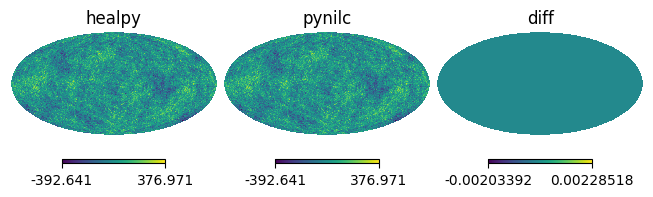

In [21]:
hp.mollview(sm_map_hp[0], title='healpy',sub=(1,3,1))
hp.mollview(sm_map_hpm[0], title='pynilc', sub=(1,3,2))
hp.mollview(sm_map_hp[0] - sm_map_hpm[0], title='diff', sub=(1,3,3))

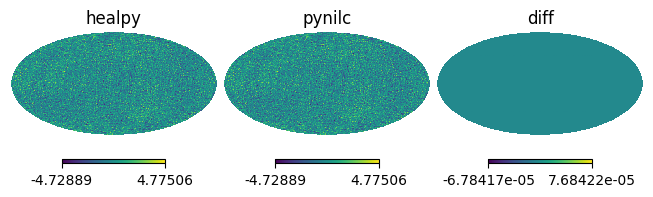

In [22]:
hp.mollview(sm_map_hp[1], title='healpy',sub=(1,3,1))
hp.mollview(sm_map_hpm[1], title='pynilc', sub=(1,3,2))
hp.mollview(sm_map_hp[1] - sm_map_hpm[1], title='diff', sub=(1,3,3))

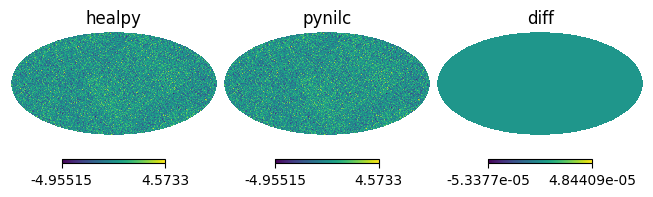

In [23]:
hp.mollview(sm_map_hp[2], title='healpy',sub=(1,3,1))
hp.mollview(sm_map_hpm[2], title='pynilc', sub=(1,3,2))
hp.mollview(sm_map_hp[2] - sm_map_hpm[2], title='diff', sub=(1,3,3))